In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
xlsx_file = "res.xlsx"
df = pd.read_excel('res.xlsx')

In [4]:
df.columns

Index(['subject_id', 'student_id', 'c1_ass_view', 'c1_mod_view', 'c1_dis_view',
       'c1', 'normal_short', 'normal_long', 'average_session_duration_w1',
       'average_session_duration_w2', 'average_session_duration_w3',
       'average_session_duration_w4', 'average_session_duration_w5',
       'average_session_duration_w6', 'average_session_duration_w7',
       'average_session_duration_w8', 'average_session_duration_w9',
       'average_session_duration_w10', 'average_session_duration_w11',
       'average_session_duration_w12', 'average_session_times_w1',
       'average_session_times_w2', 'average_session_times_w3',
       'average_session_times_w4', 'average_session_times_w5',
       'average_session_times_w6', 'average_session_times_w7',
       'average_session_times_w8', 'average_session_times_w9',
       'average_session_times_w10', 'average_session_times_w11',
       'average_session_times_w12', 'leadup_short', 'leadup_long',
       'average_leadup_session_duration_0',
   

# item1

In [5]:
# item1 --> view(ass, module,discussion)
item1_df = df[["c1_ass_view","c1_mod_view","c1_dis_view","c1"]]
item1_df

,c1_ass_view,c1_mod_view,c1_dis_view,c1
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,1,0,0,1
...,...,...,...,...
212,1,1,1,3
213,1,1,1,3
214,0,0,0,0
215,1,1,1,3


In [6]:
print(np.corrcoef((df["c1_ass_view"],df["c1_mod_view"],df["c1_dis_view"],df["c1"])))

[[1.         0.94463501 0.9000357  0.97466331]
 [0.94463501 1.         0.91603105 0.98002584]
 [0.9000357  0.91603105 1.         0.96445392]
 [0.97466331 0.98002584 0.96445392 1.        ]]


In [7]:
corr_pearson = item1_df.corr(method='pearson')
corr_kendall = item1_df.corr(method='kendall')
corr_spearman = item1_df.corr(method='spearman')

corr_pearson

,c1_ass_view,c1_mod_view,c1_dis_view,c1
c1_ass_view,1.000000,0.944635,0.900036,0.974663
c1_mod_view,0.944635,1.000000,0.916031,0.980026
c1_dis_view,0.900036,0.916031,1.000000,0.964454
c1,0.974663,0.980026,0.964454,1.000000


<AxesSubplot:>

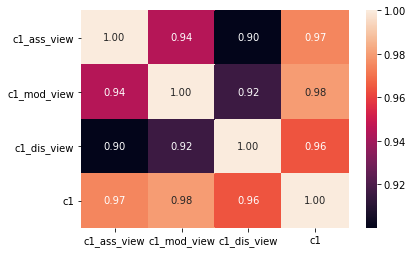

In [8]:
plt.figure()
sns.heatmap(data=corr_pearson, annot = True, fmt = ".2f")

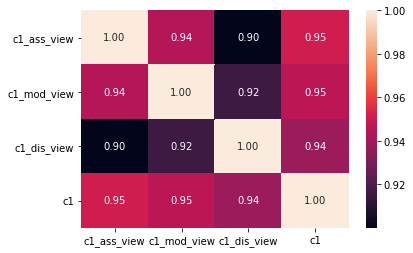

In [59]:
plt.figure()
sns.heatmap(data=corr_kendall,annot = True, fmt = ".2f")
plt.savefig('item1.png',dpi = 100)

<AxesSubplot:>

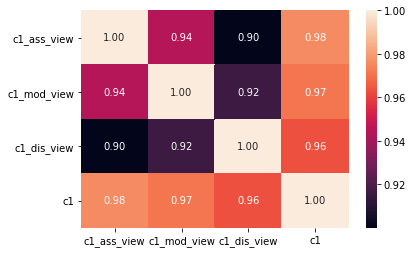

In [10]:
plt.figure()
sns.heatmap(data=corr_spearman,annot = True, fmt = ".2f")

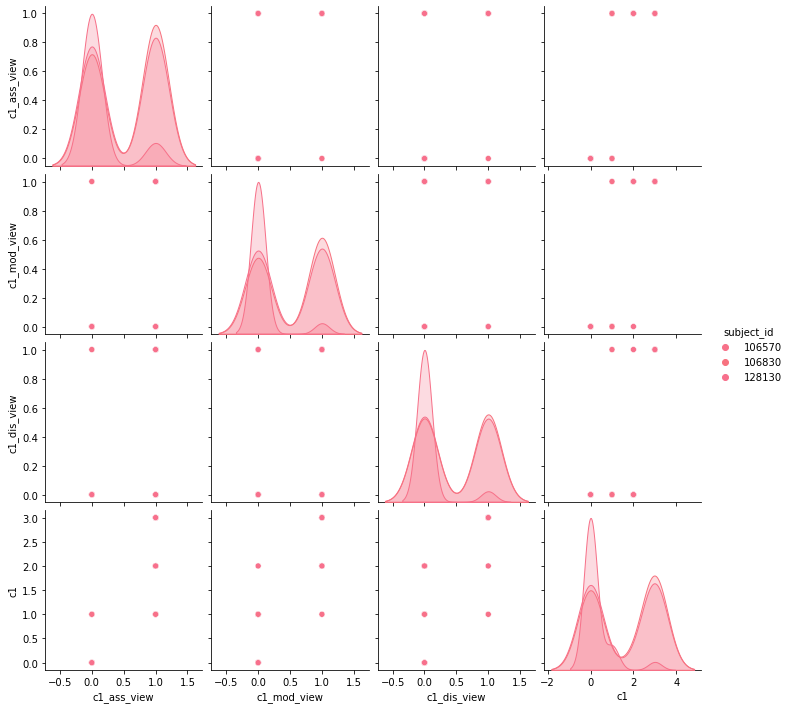

In [11]:
item1_df_plus = df[["subject_id","c1_ass_view","c1_mod_view","c1_dis_view","c1"]]


sns.pairplot(data = item1_df_plus,
             kind="scatter",
             hue="subject_id",
             palette="husl")
plt.show()

# item2:Paces learning across the semester

In [12]:
item2_df = df[["normal_short","normal_long","leadup_short","leadup_long","c2"]]
item2_df

,normal_short,normal_long,leadup_short,leadup_long,c2
0,1.000000,0.083333,1.0,0.600000,3
1,1.000000,0.166667,1.0,0.400000,3
2,0.916667,0.083333,1.0,0.000000,2
3,1.000000,0.666667,1.0,0.400000,3
4,1.000000,0.666667,1.0,0.400000,3
...,...,...,...,...,...
212,1.000000,0.083333,0.5,0.000000,2
213,1.000000,0.416667,0.5,0.333333,3
214,0.000000,0.000000,0.0,0.000000,0
215,1.000000,0.583333,0.5,0.333333,3


              normal_short  normal_long  leadup_short  leadup_long        c2
normal_short      1.000000     0.571105      0.649648     0.235657  0.753214
normal_long       0.571105     1.000000      0.588018     0.081180  0.329548
leadup_short      0.649648     0.588018      1.000000     0.273949  0.669200
leadup_long       0.235657     0.081180      0.273949     1.000000  0.604218
c2                0.753214     0.329548      0.669200     0.604218  1.000000


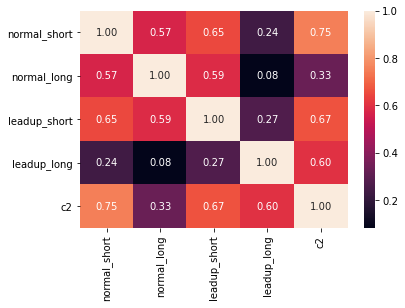

In [60]:
corr2_pearson = item2_df.corr(method='pearson')
print(corr2_pearson)

plt.figure()
sns.heatmap(data=corr2_pearson, annot = True, fmt = ".2f")
plt.savefig('item2.png',dpi = 100)

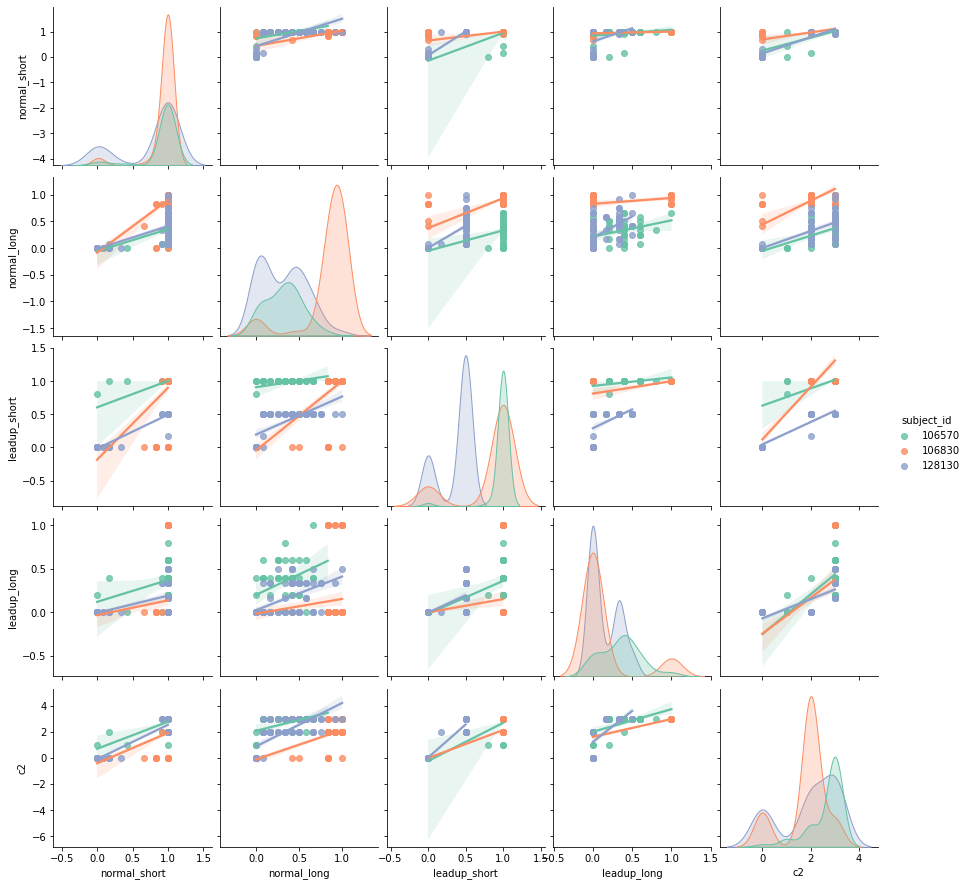

In [46]:
item2_df_plus = df[["subject_id","normal_short","normal_long","leadup_short","leadup_long","c2"]]

dt1 = item2_df_plus.apply(lambda x: ((x - np.min(x)) / (np.max(x) - np.min(x))))

sns.pairplot(data = item2_df_plus,
             kind="reg",
             hue="subject_id",
             palette="Set2")
plt.show()

In [15]:
item2_df

r_ab = df.normal_short.corr(df.normal_long)
r_ac = df.normal_short.corr(df.c2)
r_bc = df.normal_long.corr(df.c2)
ns_nl = (r_ab-r_ac*r_bc)/(((1-r_ac**2)**0.5)*((1-r_bc**2)**0.5))
print(ns_nl)

0.5199167642873016


In [16]:
r_ab = df.leadup_short.corr(df.leadup_long)
r_ac = df.leadup_short.corr(df.c2)
r_bc = df.leadup_long.corr(df.c2)
ls_ll = (r_ab-r_ac*r_bc)/(((1-r_ac**2)**0.5)*((1-r_bc**2)**0.5))
print(ls_ll)

-0.2202208621539831


In [17]:
r_ab = df.normal_short.corr(df.leadup_short)
r_ac = df.normal_short.corr(df.c2)
r_bc = df.leadup_short.corr(df.c2)
ns_ls = (r_ab-r_ac*r_bc)/(((1-r_ac**2)**0.5)*((1-r_bc**2)**0.5))
print(ns_ls)

0.29787709925206074


In [18]:
r_ab = df.normal_long.corr(df.leadup_long)
r_ac = df.normal_long.corr(df.c2)
r_bc = df.leadup_long.corr(df.c2)
nl_ll = (r_ab-r_ac*r_bc)/(((1-r_ac**2)**0.5)*((1-r_bc**2)**0.5))
print(nl_ll)

-0.15676959124348863


In [19]:
from pandas import DataFrame
partial_correlation = {'ns_nl':{'c2':ns_nl},
                       'ls_ll':{'c2':ls_ll},
                       'ns_ls':{'c2':ns_ls},
                       'nl_ll':{'c2':nl_ll}}
partial_corelation_df = DataFrame(partial_correlation)
partial_corelation_df

,ns_nl,ls_ll,ns_ls,nl_ll
c2,0.519917,-0.220221,0.297877,-0.15677


# item3:Reads instructions of assessments 

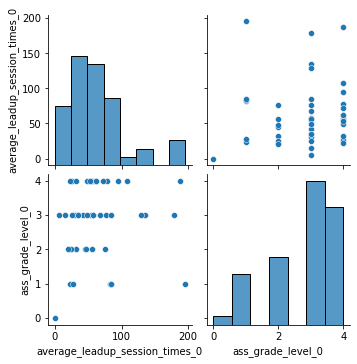

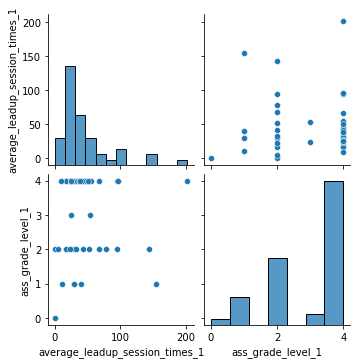

In [20]:
item3_df = df[["subject_id","average_leadup_session_times_0","average_leadup_session_times_1","average_leadup_session_times_2","average_leadup_session_times_3","average_leadup_session_times_4"]]
subjectA = df[item3_df["subject_id"] == 106570]
item3_A = subjectA[["average_leadup_session_times_0","average_leadup_session_times_1","average_leadup_session_times_2","average_leadup_session_times_3","average_leadup_session_times_4","ass_grade_level_0","ass_grade_level_1","ass_grade_level_2","ass_grade_level_3","ass_grade_level_4"]]
item3_A
A_ass1 = item3_A[["average_leadup_session_times_0","ass_grade_level_0"]]

sns.pairplot(data = A_ass1,
             kind="scatter",
             palette="Set2")
plt.show()

item3_A = subjectA[["average_leadup_session_times_0","average_leadup_session_times_1","average_leadup_session_times_2","average_leadup_session_times_3","average_leadup_session_times_4","ass_grade_level_0","ass_grade_level_1","ass_grade_level_2","ass_grade_level_3","ass_grade_level_4"]]
item3_A
A_ass2 = item3_A[["average_leadup_session_times_1","ass_grade_level_1"]]
sns.pairplot(data = A_ass2,
             kind="scatter",
             palette="Set2")
plt.show()

<AxesSubplot:>

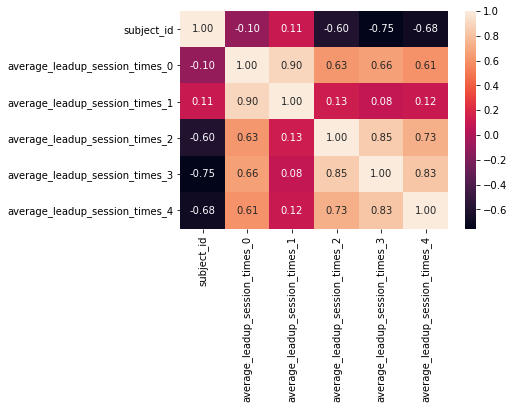

In [21]:
corr3_pearson = item3_df.corr(method='pearson')

plt.figure()
sns.heatmap(data=corr3_pearson, annot = True, fmt = ".2f")

# item5: Pulls together information from various sources

In [22]:
item5_df= df[["source_visit_session","source_visit_week_w1","source_visit_week_w2","source_visit_week_w3","source_visit_week_w4",
              "source_visit_week_w5","source_visit_week_w6","source_visit_week_w7","source_visit_week_w8","source_visit_week_w9",
              "source_visit_week_w10","source_visit_week_w11","source_visit_week_w12","c5grade"]]

#define time period ass0--week1,2 ass1--week3,4,5  ass2--weeek 6-7 ass3--week8,9 ass4--week10,11,12
source_visit_ass0 = (item5_df["source_visit_week_w1"]+item5_df["source_visit_week_w2"])/2
source_visit_ass0
source_visit_ass1 = (item5_df["source_visit_week_w3"]+item5_df["source_visit_week_w4"]+item5_df["source_visit_week_w5"])/3
source_visit_ass2 = (item5_df["source_visit_week_w6"]+item5_df["source_visit_week_w7"])/2
source_visit_ass3 = (item5_df["source_visit_week_w8"]+item5_df["source_visit_week_w9"])/2
source_visit_ass4 = (item5_df["source_visit_week_w10"]+item5_df["source_visit_week_w11"]+item5_df["source_visit_week_w12"])/3

source_visit = {"source_visit_ass0":source_visit_ass0,
               "source_visit_ass1":source_visit_ass1,
               "source_visit_ass2":source_visit_ass2,
               "source_visit_ass3":source_visit_ass3,
               "source_visit_ass4":source_visit_ass4,
               "c5_grade":item5_df["c5grade"]}
source_visit_df = DataFrame(source_visit)
source_visit_df

,source_visit_ass0,source_visit_ass1,source_visit_ass2,source_visit_ass3,source_visit_ass4,c5_grade
0,0.0,0.0,0.0,0.0,0.000000,0
1,0.0,0.0,0.0,0.0,0.000000,0
2,0.0,0.0,0.0,0.0,0.000000,0
3,0.0,0.0,0.0,0.0,0.000000,0
4,0.0,0.0,0.0,0.0,0.000000,0
...,...,...,...,...,...,...
212,3.0,2.0,0.0,0.0,0.000000,2
213,7.5,2.0,2.5,1.5,0.333333,1
214,0.0,0.0,0.0,0.0,0.000000,0
215,5.0,1.0,0.0,1.5,1.333333,1


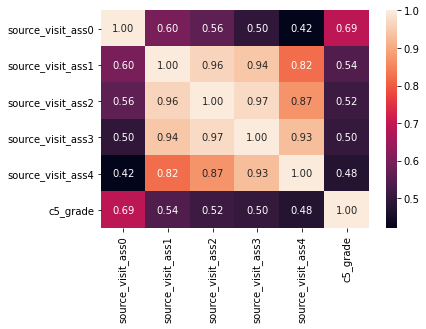

In [58]:
corr4_pearson = source_visit_df.corr(method='pearson')

plt.figure()
sns.heatmap(data=corr4_pearson, annot = True, fmt = ".2f")
plt.savefig('heatmap.png',dpi = 100)

C:\Users\jiayaot\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\jiayaot\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


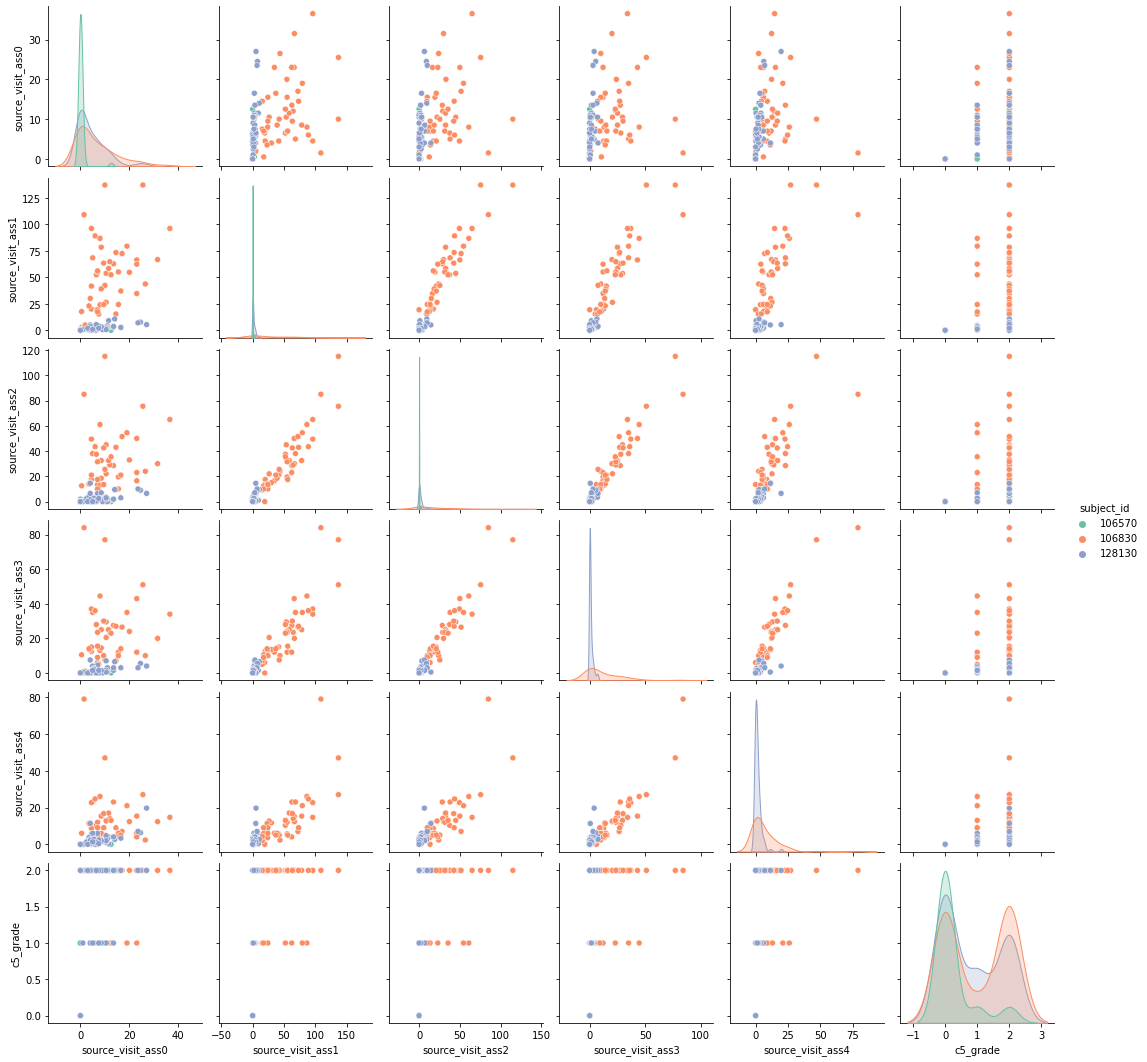

In [57]:
#item4_df_plus = df[["subject_id","source_visit_ass0","source_visit_ass1","source_visit_ass2","source_visit_ass3","source_visit_ass4","c4_grade"]]

item5_df2= df[["source_visit_session","source_visit_week_w1","source_visit_week_w2","source_visit_week_w3","source_visit_week_w4",
              "source_visit_week_w5","source_visit_week_w6","source_visit_week_w7","source_visit_week_w8","source_visit_week_w9",
              "source_visit_week_w10","source_visit_week_w11","source_visit_week_w12","c5grade","subject_id"]]

source_visit2 = {"source_visit_ass0":source_visit_ass0,
               "source_visit_ass1":source_visit_ass1,
               "source_visit_ass2":source_visit_ass2,
               "source_visit_ass3":source_visit_ass3,
               "source_visit_ass4":source_visit_ass4,
               "c5_grade":item5_df2["c5grade"],
                "subject_id":item5_df2["subject_id"]}
source_visit_df2 = DataFrame(source_visit2)



sns.pairplot(data = source_visit_df2,
             kind="scatter",
             hue="subject_id",
             palette="Set2")
plt.savefig('item5.png',dpi = 100)
plt.show()


# item7:Checks progress and feedback in assessments

In [168]:
item7_df= df[["check_feedback_0","check_feedback_1",
              "check_feedback_2","check_feedback_3",
              "check_feedback_4","check_grade"
              ,"c7_grade"]]

item7_df 

,check_feedback_0,check_feedback_1,check_feedback_2,check_feedback_3,check_feedback_4,check_grade,c7_grade
0,0,0,0.0,0.0,0.0,0.0,0
1,0,0,0.0,0.0,0.0,0.0,0
2,0,0,0.0,0.0,0.0,0.0,0
3,0,0,0.0,0.0,0.0,0.0,0
4,0,0,1.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...
212,0,0,0.0,0.0,0.0,0.0,0
213,1,0,0.0,0.0,0.0,0.0,0
214,0,0,0.0,0.0,0.0,0.0,0
215,0,0,0.0,0.0,0.0,0.0,0


<AxesSubplot:>

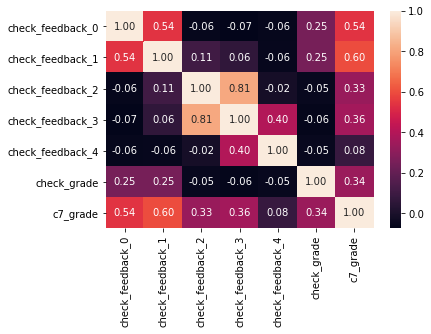

In [170]:
corr7_pearson = item7_df.corr(method='pearson')

plt.figure()
sns.heatmap(data=corr7_pearson, annot = True, fmt = ".2f")

In [171]:
item7_df_plus= df[["subject_id","check_feedback_0","check_feedback_1",
              "check_feedback_2","check_feedback_3",
              "check_feedback_4","check_grade",
              "ass_grade_level_0","ass_grade_level_1",
                "ass_grade_level_2","ass_grade_level_3","ass_grade_level_4","c7_grade"]]

item7_df_plus

,subject_id,check_feedback_0,check_feedback_1,check_feedback_2,check_feedback_3,check_feedback_4,check_grade,ass_grade_level_0,ass_grade_level_1,ass_grade_level_2,ass_grade_level_3,ass_grade_level_4,c7_grade
0,106570,0,0,0.0,0.0,0.0,0.0,2,1,2.0,3.0,1.0,0
1,106570,0,0,0.0,0.0,0.0,0.0,1,2,2.0,3.0,1.0,0
2,106570,0,0,0.0,0.0,0.0,0.0,3,4,1.0,1.0,2.0,0
3,106570,0,0,0.0,0.0,0.0,0.0,4,4,3.0,3.0,4.0,0
4,106570,0,0,1.0,1.0,0.0,0.0,3,4,1.0,4.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,128130,0,0,0.0,0.0,0.0,0.0,2,4,0.0,0.0,0.0,0
213,128130,1,0,0.0,0.0,0.0,0.0,3,4,0.0,0.0,0.0,0
214,128130,0,0,0.0,0.0,0.0,0.0,-1,-1,-1.0,-1.0,-1.0,0
215,128130,0,0,0.0,0.0,0.0,0.0,4,2,0.0,0.0,0.0,0


In [1]:
average_check_feedback = (df["check_feedback_0"]+df["check_feedback_1"]+df["check_feedback_2"]+df["check_feedback_3"]
                         +df["check_feedback_4"])/5

overall_item7 = {"average_check_feedback":average_check_feedback,
               "c7_grade":item7_df_plus["c7_grade"],
                 "check_grade":item7_df_plus["check_grade"],
                "subject_id":item7_df_plus["subject_id"]}
overall_item7 = DataFrame(overall_item7)

item7_df= df[["subject_id","check_feedback_0","check_feedback_1",
              "check_feedback_2","check_feedback_3",
              "check_feedback_4","check_grade"
              ,"c7_grade"]]

sns.pairplot(data = overall_item7,
             kind="scatter",
             hue="subject_id",
             palette="Set2")
plt.show()

NameError: name 'df' is not defined

# General correlation

In [41]:
import math
import array
import numpy as np

In [11]:
general_df = df[["c1","c2","c3_grade","c4_grade","c5grade","c7_grade","final_grade_score"]]
general_df

for i in range(217):
    if math.isnan(general_df["final_grade_score"][i]) == True:
        general_df.drop(labels = i,axis = 0,inplace = True)

        
#general_df.drop(labels = 216,axis = 0,inplace = True)
general_df
#type(general_df["final_grade_score"][214])

,c1,c2,c3_grade,c4_grade,c5grade,c7_grade,final_grade_score
0,0,3,0,0,0,0,75.00
1,0,3,0,0,0,0,71.00
2,0,2,0,0,0,0,67.25
3,0,3,0,0,0,0,88.50
4,1,3,0,0,0,1,70.75
...,...,...,...,...,...,...,...
210,3,3,0,1,2,1,64.69
211,3,3,0,3,2,0,56.82
212,3,2,0,1,2,0,60.43
213,3,3,0,3,1,0,63.39


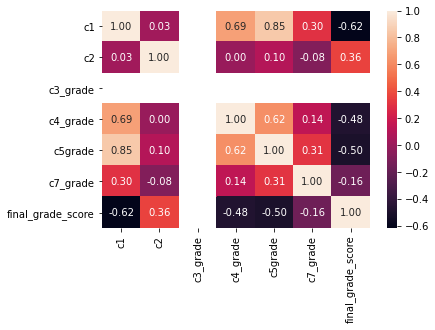

In [8]:
general_pearson = general_df.corr(method='pearson')


plt.figure()
sns.heatmap(data=general_pearson, annot = True, fmt = ".2f")
plt.savefig('item_vs_finalgrade.png')

In [12]:
general_pearson = general_df.corr(method='pearson')

general_pearson

,c1,c2,c3_grade,c4_grade,c5grade,c7_grade,final_grade_score
c1,1.000000,-0.050317,NaN,0.790606,0.855272,0.317197,-0.751457
c2,-0.050317,1.000000,NaN,-0.102763,0.033534,-0.078725,0.219133
c3_grade,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c4_grade,0.790606,-0.102763,NaN,1.000000,0.707816,0.234146,-0.712172
c5grade,0.855272,0.033534,NaN,0.707816,1.000000,0.310142,-0.646195
c7_grade,0.317197,-0.078725,NaN,0.234146,0.310142,1.000000,-0.211757
final_grade_score,-0.751457,0.219133,NaN,-0.712172,-0.646195,-0.211757,1.000000


<AxesSubplot:>

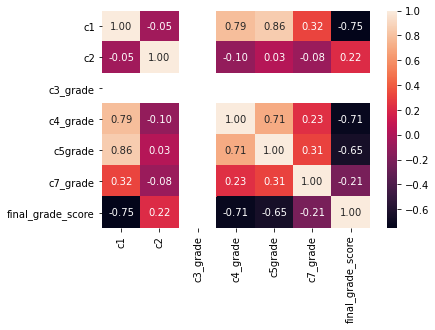

In [9]:
general_pearson = general_df.corr(method='spearman')

plt.figure()
sns.heatmap(data=general_pearson, annot = True, fmt = ".2f")


<AxesSubplot:>

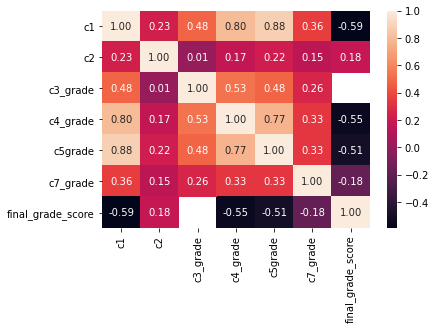

In [181]:
general_pearson = general_df.corr(method='kendall')

plt.figure()
sns.heatmap(data=general_pearson, annot = True, fmt = ".2f")

In [12]:
general_df2 = df[["c1","c2","c3_grade","c4_grade","c5grade","c7_grade","final_grade_level"]]
general_df2

for i in range(216):
    level = general_df2["final_grade_level"][i]
    #H1 = 5, H2A =4, H2B = 3, H3 =2, P=1, NaN = 0
    if level == str("H1"):
        general_df2["final_grade_level"][i] = int(5)
    if level == str("H2A"):
        general_df2["final_grade_level"][i] = int(4)
    if level == str("H2B"):
        general_df2["final_grade_level"][i] = int(3)
    if level == str("H3"):
        general_df2["final_grade_level"][i] = int(2)
    if level == str("P"):
        general_df2["final_grade_level"][i] = int(1)
    if level == str("NaN"):
        general_df2["final_grade_level"][i] = int(0)
general_df2

<ipython-input-12-b02f5274dd6f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  general_df2["final_grade_level"][i] = int(4)
C:\Users\jiayaot\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-12-b02f5274dd6f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  general_df2["final_grade_level"][i] = int(3)
<ipyt

,c1,c2,c3_grade,c4_grade,c5grade,c7_grade,final_grade_level
0,0,3,0,0,0,0,4
1,0,3,0,0,0,0,3
2,0,2,0,0,0,0,2
3,0,3,0,0,0,0,5
4,1,3,0,0,0,1,3
...,...,...,...,...,...,...,...
212,3,2,0,1,2,0,1
213,3,3,0,3,1,0,1
214,0,0,0,0,0,0,NaN
215,3,3,0,0,1,0,1


<AxesSubplot:>

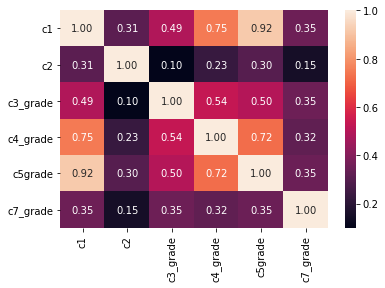

In [13]:
general_kendall = general_df2.corr(method='pearson')

plt.figure()
sns.heatmap(data=general_kendall, annot = True, fmt = ".2f")

In [27]:
df_weight = df[["c1","c2","c3_grade","c4_grade","c5grade","c7_grade"]]

#数据标准化
dt1 = df_weight.apply(lambda x: ((x - np.min(x)) / (np.max(x) - np.min(x))))

In [43]:


#k值
rows = dt1.index.size #行值
cols = dt1.columns.size #列值
k = 1.0/math.log(rows)


#矩阵计算 、信息熵
x = np.array(dt1)
inf = [[None]*cols for i in range(rows)] #创建空值矩阵
inf = np.array(inf)
for i in range(0,rows):
    for j in range(0,cols):
        if x[i][j] == 0:
            infij = 0
        else:
            p = x[i][j] /x.sum(axis=0)[j]
            infij = math.log(p)*p*(-k)
    inf[i][j] = infij
inf = pd.DataFrame(inf)
E = inf

 #计算冗余度
d = 1-E.sum(axis=0)
#计算各指标的权重
w = [[None] * 1 for i in range(cols)]
for j in range(0, cols):
    wj = d[j] / sum(d)
    w[j] = wj
# 计算各样本的综合得分,用最原始的数据 
w = pd.DataFrame(w)
w

,0
0,0.184958
1,0.184958
2,0.184958
3,0.184958
4,0.184958
5,0.075211


In [42]:
np.array(dt1)

array([[0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.66666667, 0.        , 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.        , 0.        , 0.5       ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]])